# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Zpracování

## Průzkum dat

In [425]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
import torchvision

#path, where best model will be later saved
MODEL_PATH = "saves/best_model1.pt"

Načtu si data a udělám stručný průzkum.

In [426]:
df = pd.read_csv('train.csv')

In [427]:
display(df.head())
print(f"Shape: {df.shape}")
print(f"Unique labels: {df['label'].nunique()}")

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,4,4,4,4,4,4,5,5,5,6,...,4,4,4,4,4,4,4,4,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


Shape: (56000, 1025)
Unique labels: 10


Dataset obsahuje 56 tisíc obrázků 10 různých druhů oblečení. Labely by měly odpovídat takto:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Několik obrázků si pro lepší představu zobrazím.

In [428]:
def show_first_imgs(count, figsize_x=7, figsize_y=7):
    """function that plots first count images in a grid with their labels"""
    #get size of one row
    size = int(pow(count, 1/2))
    fig, ax = plt.subplots(size, size, figsize=(figsize_x,figsize_y))
    fig.tight_layout()
    # get data accordingly
    data = df.head(size*size)
    
    for num, row in data.iterrows():
        label = row["label"]
        row = row.drop("label")
        img = np.array(row, dtype=int).reshape((32, 32))

        i = num // size
        j = num % size
        #plot in grayscale
        ax[i][j].imshow(img, cmap='gray', vmin=0, vmax=255)
        #remove ticks and numbers
        ax[i][j].axis("off")
        #plot label
        if label == 0:
            ax[i][j].set_title("T-shirt/top")
        elif label == 1:
            ax[i][j].set_title("Trousers")
        elif label == 2:
            ax[i][j].set_title("Pullover")
        elif label == 3:
            ax[i][j].set_title("Dress")
        elif label == 4:
            ax[i][j].set_title("Coat")
        elif label == 5:
            ax[i][j].set_title("Sandal")
        elif label == 6:
            ax[i][j].set_title("Shirt")
        elif label == 7:
            ax[i][j].set_title("Sneaker")
        elif label == 8:
            ax[i][j].set_title("Bag")
        elif label == 9:
            ax[i][j].set_title("Ankle boot")
        else:
            ax[i][j].set_title("Unknown")

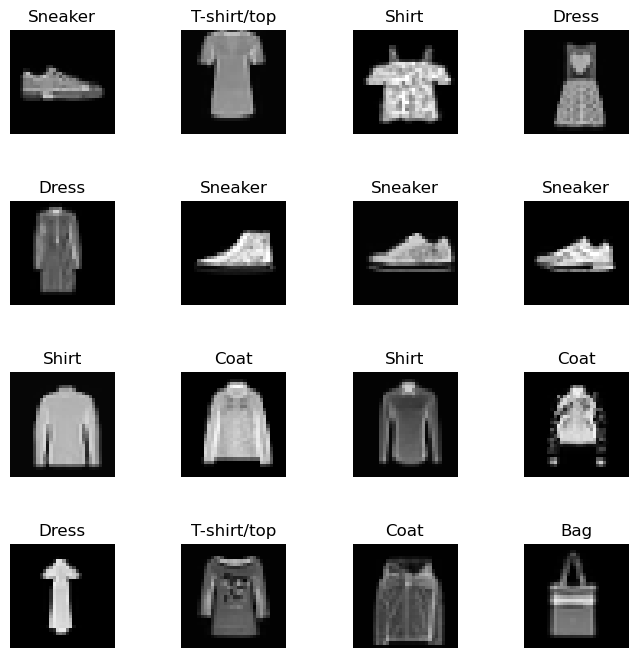

In [429]:
show_first_imgs(16)

Obrázky vypadají v pořádku a labely odpovídají.

## Příprava dat

Data si teď převedu lepšího formátu s kterým umí `pytorch` pracovat.

In [430]:
#transform to numpy and separate labels
source_imgs = df.drop("label", axis=1).to_numpy()
source_labels = df["label"].to_numpy()
#reshape imgs to ndarray
source_imgs = source_imgs.reshape(-1, 1, 32, 32)
print(source_imgs.shape, source_labels.shape)

(56000, 1, 32, 32) (56000,)


In [431]:
#create pytorch tensor dataset
dataset = torch.utils.data.TensorDataset(torch.tensor(source_imgs, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

print(f"Number of elements: {len(dataset)}")

Number of elements: 56000


Data si dále rozdělím na trénovací, validační a testovací.

In [432]:
#create random generator
gen = torch.Generator().manual_seed(124)
#split data
train_data, val_data, test_data = torch.utils.data.random_split(dataset, [0.7, 0.15, 0.15], generator=gen)
print(f"Train size: {len(train_data)}\nValidation size: {len(val_data)}\nTest size: {len(test_data)}")

Train size: 39200
Validation size: 8400
Test size: 8400


Na jednlotlivé množiny si ještě připravím `DataLoader`.

In [433]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=False)

## Dopředná neuronová síť

Výhoda neuronových sítí spočívá v tom, že se samy dokáží naučit řešit i velmi složité problémy (do jisté míry). Při větší velikosti jsou ale sítě dost náchylné na přeučení (kvůli obrovskému množství parametrů se dobře přizpůsobí trénovacím datům). Tomu budu muset zamezit nějakou formou regularizace. 

Konkrétně dopředná neuronová síť by klasifikaci mohla zvládnout celkem dobře. I když pravděpodobně ne tak dobře jako konvoluční síť, která bývá často na klasifikaci obrázků lepší, jelikož potřebuje méně parametrů a zároveň dokáže pomocí konvoluce lépe zachytit "vlastnosti" obrázků.

Nejprve zkusím vytvořit jednoduchou dopřednou síť skládající se pouze ze dvou vrstev a potom podle výsledků budu síť zvětšovat a zkoušet další možnosti, jak výslednou přesnost vylepšit.

Jako ztrátovou funkci použiji kategorickou relativní entropii, takže na výstupu sítě nemusím používat žádnou aktivační funkci (použiji až ve chvíli, kdy budu chtít zjisti konkrétní pravděpodobnosti). Jako aktivační funkci pro skrytou vrstvu použiji *RELU*. Jako optimizer vyzkouším nejprve základní *SGD* s učícím paremetrem `lr=0.1`.

Jako formu regularizace použiji rovnou *early stopping*, abych netrénoval modely zbytečně.

In [434]:
class FwdNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32, 16)
        self.fco = nn.Linear(16, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = self.fco(x)
        return x

In [456]:
model = FwdNN()

#define loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.1)

Ještě se ze zajímavosti podívám, kolik má tento "jednoduchý" model parametrů.

In [436]:
def total_param_count(model):
    param_count = sum(param.numel() for param in model.parameters())
    print(f"Total number of parameters: {param_count}")
    
total_param_count(model)

Total number of parameters: 16570


I takto malý model má přes 16 tisíc parametrů. To je dáno hlavně velikostí vstupu, ale stejně je to už poměrně vysoké číslo. Konvoluční sítě, které budu zkoušet později, by měly mít parametrů podstatně méně (při podobné velikosti).

Napíšu si funkce, které budou obstarávat trénování modelů a funkci na vykreslení chyby modelu v průběhu učení (inspirovány kódem ze cvičení).

In [440]:
def plot_loss(train_list, val_list):
    length = len(train_list)
    plt.plot(np.arange(length)+1,train_list, '.-', label='Train loss')
    plt.plot(np.arange(length)+1,val_list, '.-', label='Validation loss')
    plt.title("Validation and training loss by epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [437]:
def train_one_epoch(model, loss_fn, optimizer, loader):
    running_cum_loss = 0.
    for inputs, labels in loader:
        # set grad to zero
        optimizer.zero_grad()
        # Make predictions for this batch
        outputs = model(inputs)
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        # Backpropagation
        loss.backward()
        # Adjust learning weights
        optimizer.step()
        # Add current loss to total loss
        running_cum_loss += loss.item() * inputs.shape[0]
    
    # Return average loss
    return running_cum_loss / len(train_data)

In [451]:
def early_stopping_train(model, loss_fn, optimizer, train_loader=train_loader, print_step=5,
                         val_loader=val_loader, max_epoch=100, not_improved_limit=5, show_plot=True):
    best_vloss = 1000000.
    not_improved_count = 0
    train_loss_list = []
    val_loss_list = []
    vacc_list = []

    for epoch in tqdm(range(max_epoch)):
        #change model to trianing mode
        model.train()
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        # Validation performance
        model.eval()
        running_cum_vloss = 0.0
        vcorrect = 0
        for (vinputs, vlabels) in val_loader:
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuraccy
        avg_vloss = running_cum_vloss / len(val_data)
        vacc = vcorrect / len(val_data)

        # collect values
        train_loss_list.append(avg_loss)
        val_loss_list.append(avg_vloss)
        vacc_list.append(vacc)

        # Track best performance, and save the model's state
        if avg_vloss < best_vloss:
            not_improved_count = 0
            best_vloss = avg_vloss
            torch.save(model.state_dict(), MODEL_PATH)
        else:
            not_improved_count += 1
            
        # break if model hasn't improved in a while
        if not_improved_count >= not_improved_limit:
            print(f"Model hasn't improved in the last {not_improved_limit} iterations. Training stopped.")
            break

        #show progress (first epoch and then by defined step)
        if epoch == 0 or ((epoch+1) % print_step == 0):
            print(f"Epoch: {epoch+1}, TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, ACC: {vacc:.3f}")
            
    print(f"Max accuracy: {np.max(vacc_list)}")
    if show_plot:
        plot_loss(train_loss_list, val_loss_list)
    

Spustím trénování:

In [457]:
early_stopping_train(model, loss_fn, optimizer_sgd, show_plot=False)

  1%|▍                                          | 1/100 [00:03<05:36,  3.40s/it]

Epoch: 1, TRAIN loss: 6.888, VALIDATION loss: 2.303, ACC: 0.097


  5%|██▏                                        | 5/100 [00:16<05:04,  3.21s/it]

Epoch: 5, TRAIN loss: 2.303, VALIDATION loss: 2.305, ACC: 0.100


  8%|███▍                                       | 8/100 [00:28<05:33,  3.62s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.10476190596818924


Průměrná hodnota ztrátové funkce na validační množině zůstává pořád stejná a přesnost se pohybuje okolo 10%. To znamená, že model predikuje v podstatě náhodně a nedaří se mu zmenšit hodnotu ztrátové funkce.

Mohl bych zkoušet ladit učící parametr, ale radši rovnou zkusím změnit *optimizer* na `Adam` a prozkoumám, jestli to zlepší výsledky.

In [459]:
# reset the model
model = FwdNN()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, show_plot=False)

  1%|▍                                          | 1/100 [00:04<06:57,  4.21s/it]

Epoch: 1, TRAIN loss: 2.133, VALIDATION loss: 2.317, ACC: 0.204


  5%|██▏                                        | 5/100 [00:22<07:10,  4.53s/it]

Epoch: 5, TRAIN loss: 1.599, VALIDATION loss: 1.610, ACC: 0.294


 10%|████▏                                     | 10/100 [00:44<06:42,  4.47s/it]

Epoch: 10, TRAIN loss: 1.302, VALIDATION loss: 1.284, ACC: 0.483


 15%|██████▎                                   | 15/100 [01:06<06:01,  4.26s/it]

Epoch: 15, TRAIN loss: 1.247, VALIDATION loss: 1.242, ACC: 0.491


 17%|███████▏                                  | 17/100 [01:18<06:22,  4.61s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.49761903285980225


Výsledky to zlepšilo. Validační přesnost stoupla na 50%. To je sice lepší než původních 10, ale pořád to není moc dobré. Zkusím proto zvětšit počet a velikost vrstev v modelu.

In [460]:
class FwdNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fco = nn.Linear(32, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fco(x)
        return x

  1%|▍                                          | 1/100 [00:05<08:47,  5.33s/it]

Epoch: 1, TRAIN loss: 0.816, VALIDATION loss: 0.689, ACC: 0.739


 10%|████▏                                     | 10/100 [00:56<08:26,  5.62s/it]

Epoch: 10, TRAIN loss: 0.459, VALIDATION loss: 0.510, ACC: 0.810


 20%|████████▍                                 | 20/100 [01:52<07:11,  5.39s/it]

Epoch: 20, TRAIN loss: 0.405, VALIDATION loss: 0.532, ACC: 0.816


 27%|███████████▎                              | 27/100 [02:35<06:59,  5.75s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.8286904692649841


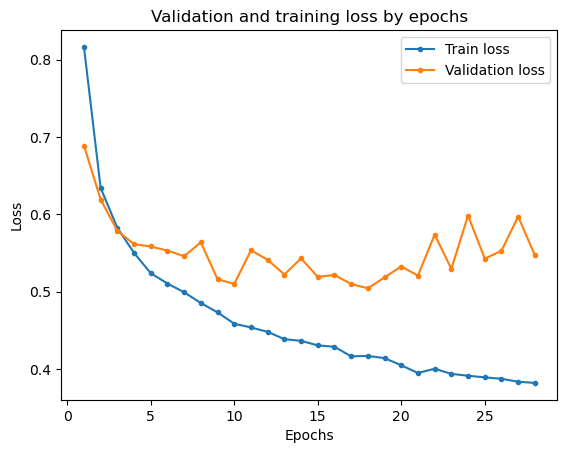

In [464]:
model = FwdNN2()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=10)

Zvětšení modelu výrazně pomohlo. Validační přesnost se zvýšila na téměř 83%. Z grafu je ale vidět, že dochází k přeučení modelu a model se zlepšuje pouze na trénovacích datech. Přidám proto regularizaci. Nejprve vyzkouším L2 regularizaci pomocí parametru `weight_decay`.

  1%|▍                                          | 1/100 [00:05<09:13,  5.59s/it]

Epoch: 1, TRAIN loss: 0.841, VALIDATION loss: 0.734, ACC: 0.712


 10%|████▏                                     | 10/100 [01:22<12:58,  8.65s/it]

Epoch: 10, TRAIN loss: 0.550, VALIDATION loss: 0.591, ACC: 0.778


 20%|████████▍                                 | 20/100 [02:52<12:14,  9.18s/it]

Epoch: 20, TRAIN loss: 0.530, VALIDATION loss: 0.578, ACC: 0.790


 30%|████████████▌                             | 30/100 [04:25<10:55,  9.37s/it]

Epoch: 30, TRAIN loss: 0.523, VALIDATION loss: 0.550, ACC: 0.798


 30%|████████████▌                             | 30/100 [04:34<10:41,  9.16s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.8071428537368774


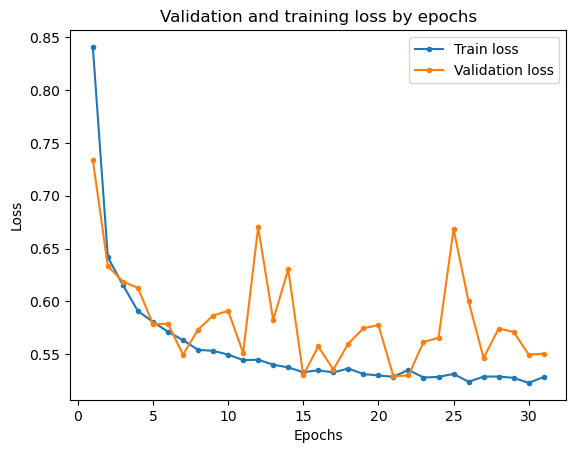

In [470]:
model = FwdNN2()
optimizer_adam = torch.optim.Adam(model.parameters(), weight_decay=0.01)
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=10)

Výsledky se oproti předchozímu stavu nezlepšily. Zkusím zvětšit hodnotu regularizačního parametru.

  1%|▍                                          | 1/100 [00:05<09:00,  5.46s/it]

Epoch: 1, TRAIN loss: 0.830, VALIDATION loss: 0.654, ACC: 0.763


 10%|████▏                                     | 10/100 [01:15<10:45,  7.17s/it]

Epoch: 10, TRAIN loss: 0.627, VALIDATION loss: 0.621, ACC: 0.771


 20%|████████▍                                 | 20/100 [02:16<08:08,  6.11s/it]

Epoch: 20, TRAIN loss: 0.617, VALIDATION loss: 0.634, ACC: 0.760


 30%|████████████▌                             | 30/100 [03:18<07:15,  6.22s/it]

Epoch: 30, TRAIN loss: 0.621, VALIDATION loss: 0.615, ACC: 0.773


 31%|█████████████                             | 31/100 [03:30<07:47,  6.78s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.7851190567016602


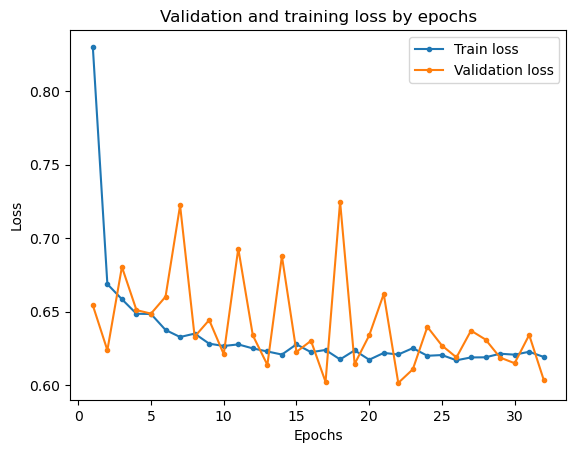

In [471]:
model = FwdNN2()
optimizer_adam = torch.optim.Adam(model.parameters(), weight_decay=0.05)
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=10)

To také nepřineslo lepší výsledky. 

Možná by mohlo pomoct nepenalizovat biasy, ale to bych musel regularizaci řešit jinak, než pomocí parametru `weigh_decay`, takže místo toho zkusím použít *dropout*, který přidám do všech vrstev modelu.

In [472]:
class FwdNN2_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout_in = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32*32, 64)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(32, 32)
        self.dropout3 = nn.Dropout(0.4)
        self.fco = nn.Linear(32, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = self.dropout_in(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fco(x)
        return x

  1%|▍                                          | 1/100 [00:06<09:59,  6.05s/it]

Epoch: 1, TRAIN loss: 1.960, VALIDATION loss: 1.442, ACC: 0.442


 10%|████▏                                     | 10/100 [01:00<09:02,  6.03s/it]

Epoch: 10, TRAIN loss: 1.319, VALIDATION loss: 1.073, ACC: 0.625


 20%|████████▍                                 | 20/100 [02:01<08:05,  6.07s/it]

Epoch: 20, TRAIN loss: 1.252, VALIDATION loss: 1.033, ACC: 0.620


 30%|████████████▌                             | 30/100 [03:02<07:04,  6.06s/it]

Epoch: 30, TRAIN loss: 1.262, VALIDATION loss: 1.065, ACC: 0.590


 40%|████████████████▊                         | 40/100 [04:02<05:59,  5.99s/it]

Epoch: 40, TRAIN loss: 1.278, VALIDATION loss: 1.097, ACC: 0.574


 50%|█████████████████████                     | 50/100 [05:04<05:10,  6.20s/it]

Epoch: 50, TRAIN loss: 1.238, VALIDATION loss: 1.029, ACC: 0.605


 52%|█████████████████████▊                    | 52/100 [05:23<04:58,  6.22s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.6514285802841187


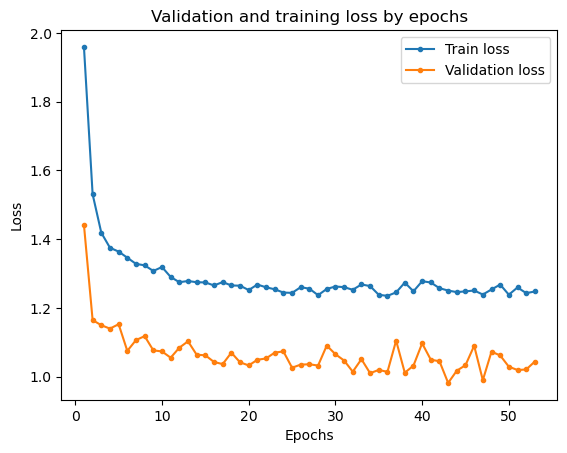

In [473]:
model = FwdNN2_dropout()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=10)

Přidání dropoutu přesnost výrazně zhoršilo. Možná jsem nastavil moc velké pravděpodobnosti. Zkusím pravděpodobnosti zmenšit a odebrat dropout z poslední vrstvy.

In [474]:
class FwdNN2_dropout2(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout_in = nn.Dropout(0.15)
        self.fc1 = nn.Linear(32*32, 64)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(32, 32)
        self.dropout3 = nn.Dropout(0.25)
        self.fco = nn.Linear(32, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = self.dropout_in(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fco(x)
        return x

  1%|▍                                          | 1/100 [00:05<09:17,  5.63s/it]

Epoch: 1, TRAIN loss: 1.236, VALIDATION loss: 0.804, ACC: 0.693


 15%|██████▎                                   | 15/100 [01:25<08:10,  5.77s/it]

Epoch: 15, TRAIN loss: 0.768, VALIDATION loss: 0.637, ACC: 0.773


 28%|███████████▊                              | 28/100 [02:44<07:03,  5.89s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.7784523963928223


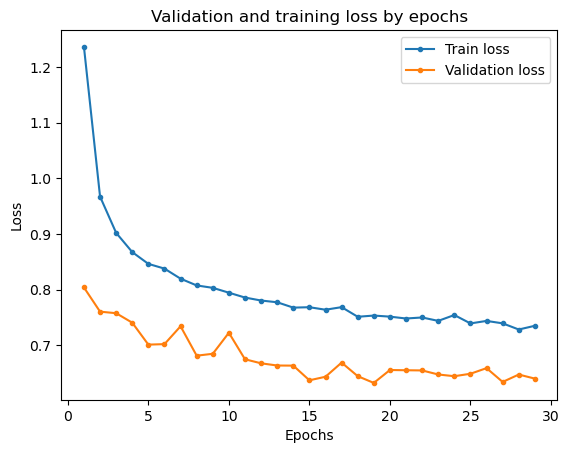

In [476]:
model = FwdNN2_dropout2()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=15)

To přesnost oproti předchozímu pokusu trochu zvedlo, ale pořád ne dostatečně. Zkusím ještě zvětšit velikost sítě, jelikož dropout vlastně omezuje, kolik toho dokáže model popsat. Zároveň dropout nebudu aplikovat po každé vrstvě, ale pouze na začátku a "uprostřed", jelikož to z grafu vypadá, že je regularizace moc silná.

In [477]:
class FwdNN3_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout_in = nn.Dropout(0.2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*32, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fco = nn.Linear(64, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = self.dropout_in(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fco(x)
        return x

  1%|▍                                          | 1/100 [00:07<11:34,  7.01s/it]

Epoch: 1, TRAIN loss: 0.956, VALIDATION loss: 0.705, ACC: 0.749


 15%|██████▎                                   | 15/100 [01:54<10:46,  7.60s/it]

Epoch: 15, TRAIN loss: 0.546, VALIDATION loss: 0.526, ACC: 0.817


 30%|████████████▌                             | 30/100 [03:49<08:56,  7.67s/it]

Epoch: 30, TRAIN loss: 0.513, VALIDATION loss: 0.506, ACC: 0.816


 33%|█████████████▊                            | 33/100 [04:20<08:47,  7.88s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.8258333206176758


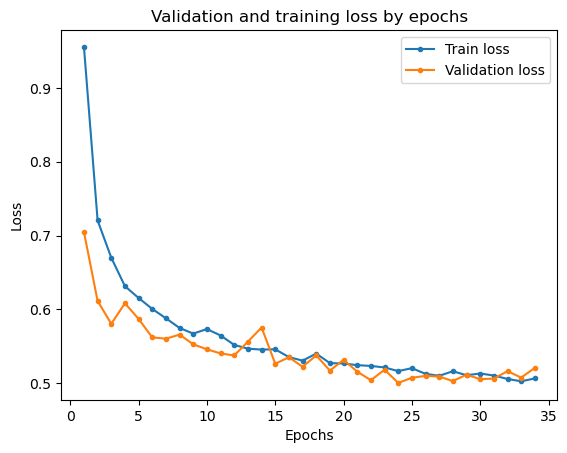

In [478]:
model = FwdNN3_dropout()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, not_improved_limit=10, print_step=15)

To přesnost trochu zvýšilo, ale opět pouze na úroveň předchozího modelu bez dropoutu.

Vyzkouším ještě, jestli přesnost nezvýší normalizace nebo standartizace dat. Vytvořím si proto odpovídající dataloadery.

In [480]:
#min max normalization
source_imgs_norm = source_imgs/255
#standartization 

#(this should be done separately for test (and val) data, but i will keep it together for simplicity)
# It shouldn't have big impact on datset this big, I will do it properly if the test set needs to be used for final evaluation
std = source_imgs.std(axis=0)
mean = source_imgs.mean(axis=0)
print(mean.shape, std.shape)
source_imgs_std = (source_imgs - mean)/std
print(source_imgs_std.shape)

(1, 32, 32) (1, 32, 32)
(56000, 1, 32, 32)


In [140]:
#create new datasets and data loaders
norm_dataset = torch.utils.data.TensorDataset(torch.tensor(source_imgs_norm, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))
std_dataset = torch.utils.data.TensorDataset(torch.tensor(source_imgs_std, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

norm_train_data, norm_val_data, norm_test_data = torch.utils.data.random_split(norm_dataset, [0.7, 0.15, 0.15], generator=gen)
std_train_data, std_val_data, std_test_data = torch.utils.data.random_split(std_dataset, [0.7, 0.15, 0.15], generator=gen)

norm_train_loader = torch.utils.data.DataLoader(norm_train_data, batch_size=32, shuffle=True)
norm_val_loader = torch.utils.data.DataLoader(norm_val_data, batch_size=128, shuffle=False)
std_train_loader = torch.utils.data.DataLoader(std_train_data, batch_size=32, shuffle=True)
std_val_loader = torch.utils.data.DataLoader(std_val_data, batch_size=128, shuffle=False)

MinMax Normalizace:

  1%|▍                                          | 1/100 [00:06<10:02,  6.08s/it]

Epoch: 1, TRAIN loss: 0.920, VALIDATION loss: 0.717, ACC: 0.735


 15%|██████▎                                   | 15/100 [01:27<08:30,  6.00s/it]

Epoch: 15, TRAIN loss: 0.370, VALIDATION loss: 0.450, ACC: 0.839


 22%|█████████▏                                | 22/100 [02:14<07:56,  6.11s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.842380940914154


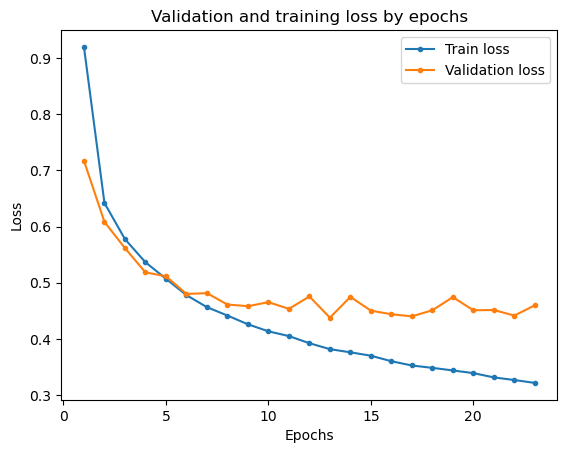

In [481]:
model = FwdNN2()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader,
                     not_improved_limit=10, print_step=15)

Standartizace:

  1%|▍                                          | 1/100 [00:09<15:08,  9.18s/it]

Epoch: 1, TRAIN loss: 0.747, VALIDATION loss: 0.577, ACC: 0.796


 15%|██████▎                                   | 15/100 [01:32<08:24,  5.94s/it]

Epoch: 15, TRAIN loss: 0.304, VALIDATION loss: 0.500, ACC: 0.839


 17%|███████▏                                  | 17/100 [01:47<08:44,  6.32s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.8403571248054504


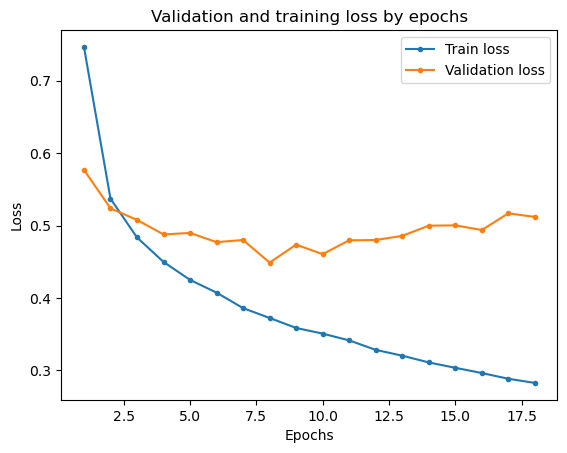

In [482]:
model = FwdNN2()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=std_train_loader, val_loader=std_val_loader,
                     not_improved_limit=10, print_step=15)

Vypadá to, že standartizace i normalizace výsledky o něco zlepšila. U obou přesnost přesáhla 84%, ale normalizace byla o trochu lepší.

Jako poslední pokus u dopředné sítě zkusím ještě na normalizovaná data použít větší model s dropoutem.

  1%|▍                                          | 1/100 [00:07<12:21,  7.49s/it]

Epoch: 1, TRAIN loss: 0.931, VALIDATION loss: 0.625, ACC: 0.757


 15%|██████▎                                   | 15/100 [01:54<11:01,  7.78s/it]

Epoch: 15, TRAIN loss: 0.440, VALIDATION loss: 0.433, ACC: 0.836


 30%|████████████▌                             | 30/100 [03:44<08:40,  7.43s/it]

Epoch: 30, TRAIN loss: 0.397, VALIDATION loss: 0.408, ACC: 0.850


 37%|███████████████▌                          | 37/100 [04:43<08:02,  7.66s/it]

Model hasn't improved in the last 10 iterations. Training stopped.
Max accuracy: 0.8515475988388062


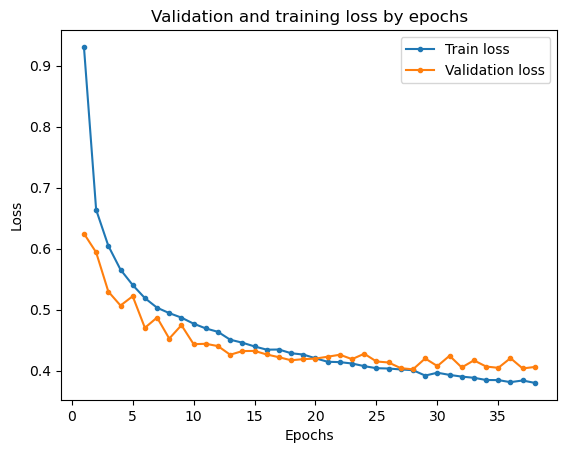

In [483]:
model = FwdNN3_dropout()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader,
                     not_improved_limit=10, print_step=15)

Normalizace pomohla, přesnost se zvýšila na 85%.

## Konvoluční neuronové sítě

Jak jsem již psal výše, konvoluční neuronové sítě bývají na klasifikaci obrázků často lepší, protože jim stačí výrazně méně parametrů než dopředným sítím a mohou být proto o dost hlubší. Další jejich výhodou je i efektivní trénování na grafických kartách, kde jde konvoluce rychle počítat.

Nejprve vytvořím menší konvoluční síť s maxpoolingem, na které otestuji, jesltli má normalizace nebo standartizace stejně pozitivní vliv na výslednou přesnost jako u dopředných sítí výše.

Na trénování použiji stejné funkce jako u dopředných sítí a ztrátovou funkci budu používat také stejnou.

In [484]:
#get one batch for testing layer dimensions
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [485]:
class ConvNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fco = nn.Linear(16*6*6, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x

In [486]:
#model = ConvNN()
#outputs = model(images)

In [492]:
model = ConvNN()

total_param_count(model)

Total number of parameters: 10714


Je vidět, že tento model má výrazně méně parametrů, než menší model u dopředné sítě.

Otestuji, jakých výsledků síť dosáhne na neupravených datech.

In [495]:
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, show_plot=False)

  1%|▍                                          | 1/100 [00:24<40:50, 24.76s/it]

Epoch: 1, TRAIN loss: 0.414, VALIDATION loss: 0.432, ACC: 0.849


  5%|██▏                                        | 5/100 [01:56<36:04, 22.78s/it]

Epoch: 5, TRAIN loss: 0.353, VALIDATION loss: 0.433, ACC: 0.852


  7%|███                                        | 7/100 [02:56<39:09, 25.26s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8517857193946838


Hned na první pokus konvoluční síť dosáhla stejných výsledků, jako nejlepší model dopředné neuoronové sítě výše.

Zkusím ještě, jestli výslednou přesnost nezvýší normalizace nebo standartizace dat.

In [496]:
#normalized data
model = ConvNN()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, show_plot=False)

  1%|▍                                          | 1/100 [00:20<34:07, 20.68s/it]

Epoch: 1, TRAIN loss: 0.749, VALIDATION loss: 0.578, ACC: 0.793


  5%|██▏                                        | 5/100 [01:43<32:37, 20.60s/it]

Epoch: 5, TRAIN loss: 0.403, VALIDATION loss: 0.406, ACC: 0.850


 10%|████▏                                     | 10/100 [03:26<30:52, 20.58s/it]

Epoch: 10, TRAIN loss: 0.343, VALIDATION loss: 0.354, ACC: 0.874


 13%|█████▍                                    | 13/100 [04:48<32:13, 22.23s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8776190280914307


In [497]:
#standartized data
model = ConvNN()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=std_train_loader,
                     val_loader=std_val_loader, show_plot=False)

  1%|▍                                          | 1/100 [00:21<35:06, 21.28s/it]

Epoch: 1, TRAIN loss: 0.647, VALIDATION loss: 0.518, ACC: 0.814


  5%|██▏                                        | 5/100 [01:45<33:12, 20.97s/it]

Epoch: 5, TRAIN loss: 0.361, VALIDATION loss: 0.407, ACC: 0.858


 10%|████▏                                     | 10/100 [03:29<31:18, 20.88s/it]

Epoch: 10, TRAIN loss: 0.301, VALIDATION loss: 0.380, ACC: 0.872


 15%|██████▎                                   | 15/100 [05:13<29:20, 20.72s/it]

Epoch: 15, TRAIN loss: 0.273, VALIDATION loss: 0.393, ACC: 0.866


 18%|███████▌                                  | 18/100 [06:35<30:03, 21.99s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8722618818283081


MinMax normalizace opět výslednou přesnost výrazně zlepšila na 87,7%. Dále zkusím, jestli volba jiných *optimizerů* nepovede k nižší validační chybě nebo alespoň k rychlejšímu poklesu chyby.

RMSprop:

In [498]:
model = ConvNN()
optimizer_RMSprop = torch.optim.RMSprop(model.parameters())
early_stopping_train(model, loss_fn, optimizer_RMSprop, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, show_plot=False)

  1%|▍                                          | 1/100 [00:19<31:56, 19.36s/it]

Epoch: 1, TRAIN loss: 2.415, VALIDATION loss: 2.305, ACC: 0.101


  5%|██▏                                        | 5/100 [01:36<30:33, 19.30s/it]

Epoch: 5, TRAIN loss: 2.304, VALIDATION loss: 2.304, ACC: 0.095


  6%|██▌                                        | 6/100 [02:16<35:35, 22.72s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.10166666656732559


Adagrad:

In [499]:
model = ConvNN()
optimizer_Adagrad = torch.optim.Adagrad(model.parameters())
early_stopping_train(model, loss_fn, optimizer_Adagrad, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, show_plot=False)

  1%|▍                                          | 1/100 [00:20<33:08, 20.09s/it]

Epoch: 1, TRAIN loss: 0.712, VALIDATION loss: 0.586, ACC: 0.795


  5%|██▏                                        | 5/100 [01:40<31:51, 20.12s/it]

Epoch: 5, TRAIN loss: 0.508, VALIDATION loss: 0.515, ACC: 0.818


 10%|████▏                                     | 10/100 [03:21<30:07, 20.08s/it]

Epoch: 10, TRAIN loss: 0.468, VALIDATION loss: 0.463, ACC: 0.835


 15%|██████▎                                   | 15/100 [05:02<28:45, 20.31s/it]

Epoch: 15, TRAIN loss: 0.445, VALIDATION loss: 0.448, ACC: 0.841


 20%|████████▍                                 | 20/100 [06:43<26:55, 20.19s/it]

Epoch: 20, TRAIN loss: 0.430, VALIDATION loss: 0.435, ACC: 0.848


 25%|██████████▌                               | 25/100 [08:24<25:06, 20.09s/it]

Epoch: 25, TRAIN loss: 0.419, VALIDATION loss: 0.428, ACC: 0.849


 30%|████████████▌                             | 30/100 [10:04<23:23, 20.04s/it]

Epoch: 30, TRAIN loss: 0.411, VALIDATION loss: 0.426, ACC: 0.850


 35%|██████████████▋                           | 35/100 [11:45<21:57, 20.27s/it]

Epoch: 35, TRAIN loss: 0.403, VALIDATION loss: 0.414, ACC: 0.855


 40%|████████████████▊                         | 40/100 [13:30<20:22, 20.37s/it]

Epoch: 40, TRAIN loss: 0.398, VALIDATION loss: 0.410, ACC: 0.854


 45%|██████████████████▉                       | 45/100 [15:10<18:22, 20.04s/it]

Epoch: 45, TRAIN loss: 0.393, VALIDATION loss: 0.406, ACC: 0.857


 50%|█████████████████████                     | 50/100 [16:51<16:48, 20.18s/it]

Epoch: 50, TRAIN loss: 0.388, VALIDATION loss: 0.403, ACC: 0.857


 55%|███████████████████████                   | 55/100 [18:32<15:04, 20.10s/it]

Epoch: 55, TRAIN loss: 0.384, VALIDATION loss: 0.400, ACC: 0.860


 60%|█████████████████████████▏                | 60/100 [20:12<13:20, 20.02s/it]

Epoch: 60, TRAIN loss: 0.381, VALIDATION loss: 0.397, ACC: 0.860


 65%|███████████████████████████▎              | 65/100 [21:52<11:40, 20.01s/it]

Epoch: 65, TRAIN loss: 0.377, VALIDATION loss: 0.395, ACC: 0.860


 70%|█████████████████████████████▍            | 70/100 [23:32<10:00, 20.02s/it]

Epoch: 70, TRAIN loss: 0.374, VALIDATION loss: 0.392, ACC: 0.861


 75%|███████████████████████████████▌          | 75/100 [25:12<08:18, 19.95s/it]

Epoch: 75, TRAIN loss: 0.372, VALIDATION loss: 0.390, ACC: 0.862


 80%|█████████████████████████████████▌        | 80/100 [26:52<06:38, 19.93s/it]

Epoch: 80, TRAIN loss: 0.369, VALIDATION loss: 0.388, ACC: 0.863


 85%|███████████████████████████████████▋      | 85/100 [28:32<05:00, 20.03s/it]

Epoch: 85, TRAIN loss: 0.367, VALIDATION loss: 0.387, ACC: 0.863


 90%|█████████████████████████████████████▊    | 90/100 [30:12<03:19, 19.98s/it]

Epoch: 90, TRAIN loss: 0.365, VALIDATION loss: 0.385, ACC: 0.864


 95%|███████████████████████████████████████▉  | 95/100 [31:52<01:40, 20.02s/it]

Epoch: 95, TRAIN loss: 0.363, VALIDATION loss: 0.387, ACC: 0.862


100%|█████████████████████████████████████████| 100/100 [33:32<00:00, 20.12s/it]

Epoch: 100, TRAIN loss: 0.361, VALIDATION loss: 0.387, ACC: 0.861
Max accuracy: 0.866190493106842


AdamW:

In [500]:
model = ConvNN()
optimizer_AdamW = torch.optim.AdamW(model.parameters())
early_stopping_train(model, loss_fn, optimizer_AdamW, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, show_plot=False)

  1%|▍                                          | 1/100 [00:20<33:41, 20.42s/it]

Epoch: 1, TRAIN loss: 0.716, VALIDATION loss: 0.542, ACC: 0.804


  5%|██▏                                        | 5/100 [01:42<32:31, 20.55s/it]

Epoch: 5, TRAIN loss: 0.380, VALIDATION loss: 0.374, ACC: 0.863


 10%|████▏                                     | 10/100 [03:25<30:43, 20.48s/it]

Epoch: 10, TRAIN loss: 0.323, VALIDATION loss: 0.345, ACC: 0.874


 15%|██████▎                                   | 15/100 [05:07<28:53, 20.40s/it]

Epoch: 15, TRAIN loss: 0.294, VALIDATION loss: 0.331, ACC: 0.881


 20%|████████▍                                 | 20/100 [06:48<27:04, 20.31s/it]

Epoch: 20, TRAIN loss: 0.272, VALIDATION loss: 0.327, ACC: 0.882


 22%|█████████▏                                | 22/100 [07:50<27:47, 21.38s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8865476250648499


RMSprop dosáhl validační přesnosti pouze 10%, takže se nijak nedokázal zlepšit od náhodného modelu. Adagrad vypadal lépe, ale k minimu konvergoval výrazně pomaleji než optimizer Adam. AdamW oproti tomu maximální přesnost ještě o procento navýšil na téměř 89%. 

Budu pokračovat s *optimizerem* Adam, ale u finálního modelu vyzkouším i AdamW.

Dále vyzkouším různé velikosti a složení konvoluční sítě. Nejprve síť pouze trochu zvětším přidáním další konvoluční vrstvy a vyšším početem kanálů.

In [165]:
class ConvNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(64, 32, 3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 16, 3)
        self.fco = nn.Linear(16*4*4, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x

In [501]:
model = ConvNN2()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, show_plot=False)

  1%|▍                                        | 1/100 [00:39<1:05:42, 39.82s/it]

Epoch: 1, TRAIN loss: 0.738, VALIDATION loss: 0.543, ACC: 0.801


  5%|██                                       | 5/100 [03:17<1:02:34, 39.52s/it]

Epoch: 5, TRAIN loss: 0.390, VALIDATION loss: 0.384, ACC: 0.859


 10%|████▏                                     | 10/100 [06:34<58:57, 39.31s/it]

Epoch: 10, TRAIN loss: 0.315, VALIDATION loss: 0.344, ACC: 0.873


 15%|██████▎                                   | 15/100 [09:58<57:00, 40.24s/it]

Epoch: 15, TRAIN loss: 0.273, VALIDATION loss: 0.336, ACC: 0.878


 18%|███████▌                                  | 18/100 [12:36<57:28, 42.05s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8794047832489014


Pouhé zvětšení sítě nepomohlo. Zkusím za konvoluční vrstvy přidat další dvě lineární.

In [218]:
class ConvNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(64, 32, 3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32*6*6, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fco = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fco(x)
        return x

  1%|▍                                        | 1/100 [00:43<1:10:58, 43.02s/it]

Epoch: 1, TRAIN loss: 0.655, VALIDATION loss: 0.436, ACC: 0.840


  5%|██                                       | 5/100 [03:41<1:10:53, 44.77s/it]

Epoch: 5, TRAIN loss: 0.293, VALIDATION loss: 0.322, ACC: 0.876


 10%|████                                    | 10/100 [07:26<1:08:10, 45.45s/it]

Epoch: 10, TRAIN loss: 0.182, VALIDATION loss: 0.317, ACC: 0.892


 11%|████▍                                   | 11/100 [08:57<1:12:27, 48.85s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.8942857384681702


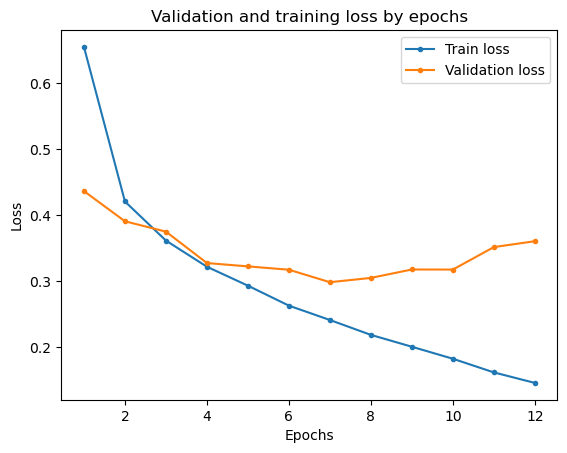

In [503]:
model = ConvNN3()
optimizer_adam = torch.optim.Adam(model.parameters())
lists = early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader,
                             val_loader=norm_val_loader)

Přidání plně propojených vrstev pomohlo a validační přesnost překročila 89%.

Na grafu můžeme vidět, že se model přeučil na trénovacích datech - od 4. epochy už validační chyba téměř neklesá a stagnuje okolo honoty 0.3, ale trénovací pořád klesá směrem k 0. Pokusím se tomu zamezit regularizací.

Nejprve zkusím přidat opět L2 regularizaci pomocí parametru `weight_decay`.

  1%|▍                                        | 1/100 [00:42<1:10:10, 42.53s/it]

Epoch: 1, TRAIN loss: 0.914, VALIDATION loss: 0.747, ACC: 0.712


  5%|██                                      | 5/100 [10:07<3:41:18, 139.78s/it]

Epoch: 5, TRAIN loss: 0.664, VALIDATION loss: 0.641, ACC: 0.767


 10%|███▉                                   | 10/100 [22:32<3:24:03, 136.04s/it]

Epoch: 10, TRAIN loss: 0.628, VALIDATION loss: 0.681, ACC: 0.742


 15%|█████▊                                 | 15/100 [32:43<2:56:04, 124.29s/it]

Epoch: 15, TRAIN loss: 0.616, VALIDATION loss: 0.595, ACC: 0.783


 19%|███████▍                               | 19/100 [42:25<3:00:52, 133.98s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.7873809337615967


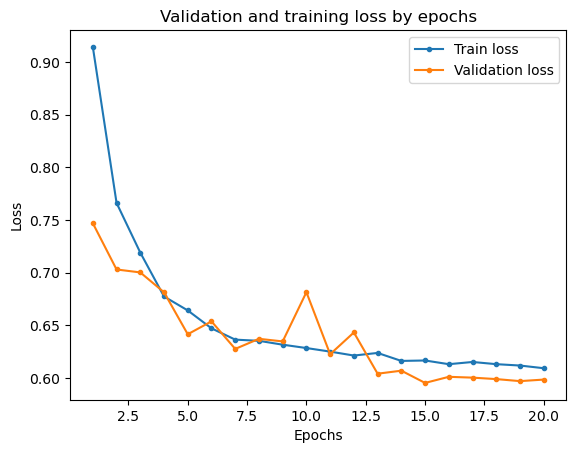

In [505]:
model = ConvNN3()
optimizer_adam = torch.optim.Adam(model.parameters(), weight_decay=0.02)
lists = early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader)

L2 regularizace přesnost nezvýšila. Sice už nedochází k přeučení, ale validační ani trénovací chyba neklesá. Zkusím proto místo L2 regularizace použít dropout, který přidám s pravděpodobností 0.5 mezi konvoluční vrstvy a po první plně propojené vrstvě.

In [506]:
class ConvNN3_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.5)
        self.conv2 = nn.Conv2d(64, 32, 3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32*6*6, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 64)
        self.fco = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fco(x)
        return x

  1%|▍                                        | 1/100 [00:45<1:15:41, 45.87s/it]

Epoch: 1, TRAIN loss: 0.821, VALIDATION loss: 0.516, ACC: 0.799


  5%|██                                       | 5/100 [03:47<1:11:57, 45.44s/it]

Epoch: 5, TRAIN loss: 0.425, VALIDATION loss: 0.340, ACC: 0.874


 10%|████                                    | 10/100 [07:31<1:07:06, 44.74s/it]

Epoch: 10, TRAIN loss: 0.348, VALIDATION loss: 0.295, ACC: 0.893


 15%|██████                                  | 15/100 [11:19<1:04:31, 45.55s/it]

Epoch: 15, TRAIN loss: 0.314, VALIDATION loss: 0.300, ACC: 0.893


 20%|████████                                | 20/100 [15:18<1:02:53, 47.17s/it]

Epoch: 20, TRAIN loss: 0.292, VALIDATION loss: 0.278, ACC: 0.899


 25%|██████████▌                               | 25/100 [19:12<57:52, 46.29s/it]

Epoch: 25, TRAIN loss: 0.279, VALIDATION loss: 0.286, ACC: 0.897


 25%|██████████▌                               | 25/100 [19:56<59:48, 47.84s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.9010714292526245


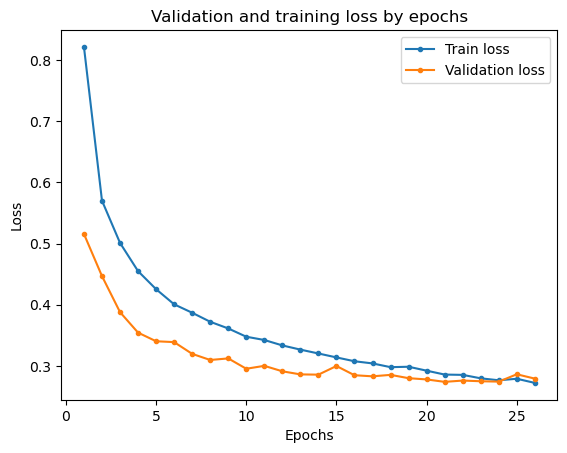

In [507]:
model = ConvNN3_dropout()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader)

Dropout validační přesnost opět o trochu zlepšil. Také je vidět, že již nedochází k přeučení a validační chyba klesá podobně rychle, jako trénovací.

Vyzkouším ještě, jesli přesnost nezvýší použití batch normalizace, kterou použiji mezi všemi vrstvami. Zároveň díky tomu nemusím používat biasy v jednotlivých vrstvách, jelikož ty nahradí transformace při batch normalizaci. Dropout v modelu také ponechám.

In [508]:
class ConvNN4_batch_norm(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, bias=False)
        self.norm1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.5)
        self.conv2 = nn.Conv2d(64, 32, 3, bias=False)
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32*6*6, 256, bias=False)
        self.norm3 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 64, bias=False)
        self.norm4 = nn.BatchNorm1d(64)
        self.fco = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.norm1(x))
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = F.relu(self.norm2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fc1(x)
        x = F.relu(self.norm3(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(self.norm4(x))
        x = self.fco(x)
        return x

  1%|▍                                        | 1/100 [00:54<1:30:30, 54.85s/it]

Epoch: 1, TRAIN loss: 0.665, VALIDATION loss: 0.469, ACC: 0.819


  5%|██                                       | 5/100 [04:19<1:21:18, 51.36s/it]

Epoch: 5, TRAIN loss: 0.362, VALIDATION loss: 0.344, ACC: 0.868


 10%|████                                    | 10/100 [08:37<1:17:07, 51.41s/it]

Epoch: 10, TRAIN loss: 0.303, VALIDATION loss: 0.273, ACC: 0.900


 15%|██████                                  | 15/100 [12:52<1:12:20, 51.07s/it]

Epoch: 15, TRAIN loss: 0.271, VALIDATION loss: 0.260, ACC: 0.905


 20%|████████                                | 20/100 [17:08<1:08:22, 51.28s/it]

Epoch: 20, TRAIN loss: 0.252, VALIDATION loss: 0.254, ACC: 0.908


 25%|██████████                              | 25/100 [21:22<1:03:26, 50.75s/it]

Epoch: 25, TRAIN loss: 0.232, VALIDATION loss: 0.261, ACC: 0.903


 25%|██████████                              | 25/100 [22:13<1:06:39, 53.32s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.9092857241630554


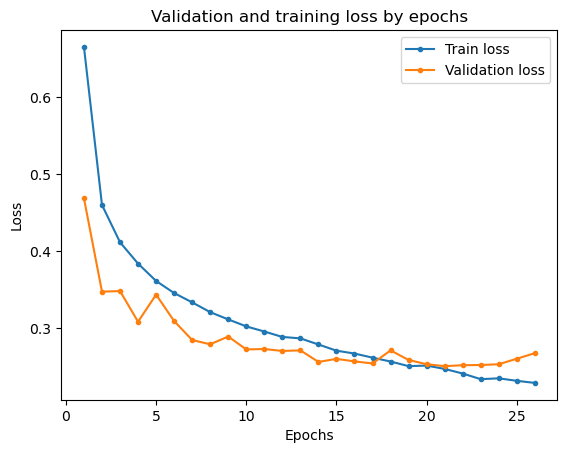

In [510]:
model = ConvNN4_batch_norm()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader)

Batch normalizace také pomohla. Validační přesnost se přiblížila 91%.

Otestuji ještě, jestli by nepomohlo použít optimizer `AdamW`, který měl dříve lepší výsledky.

  1%|▍                                        | 1/100 [00:55<1:31:56, 55.72s/it]

Epoch: 1, TRAIN loss: 0.664, VALIDATION loss: 0.459, ACC: 0.827


  5%|██                                       | 5/100 [04:45<1:31:48, 57.99s/it]

Epoch: 5, TRAIN loss: 0.371, VALIDATION loss: 0.316, ACC: 0.882


 10%|████                                    | 10/100 [09:36<1:25:07, 56.76s/it]

Epoch: 10, TRAIN loss: 0.313, VALIDATION loss: 0.277, ACC: 0.894


 15%|██████                                  | 15/100 [14:01<1:15:00, 52.94s/it]

Epoch: 15, TRAIN loss: 0.280, VALIDATION loss: 0.259, ACC: 0.904


 20%|████████                                | 20/100 [18:22<1:09:35, 52.19s/it]

Epoch: 20, TRAIN loss: 0.262, VALIDATION loss: 0.256, ACC: 0.908


 25%|██████████                              | 25/100 [23:51<1:23:35, 66.88s/it]

Epoch: 25, TRAIN loss: 0.245, VALIDATION loss: 0.256, ACC: 0.906


 30%|████████████                            | 30/100 [29:50<1:23:15, 71.36s/it]

Epoch: 30, TRAIN loss: 0.229, VALIDATION loss: 0.277, ACC: 0.897


 33%|█████████████▏                          | 33/100 [35:37<1:12:18, 64.76s/it]

Model hasn't improved in the last 5 iterations. Training stopped.
Max accuracy: 0.9080952405929565


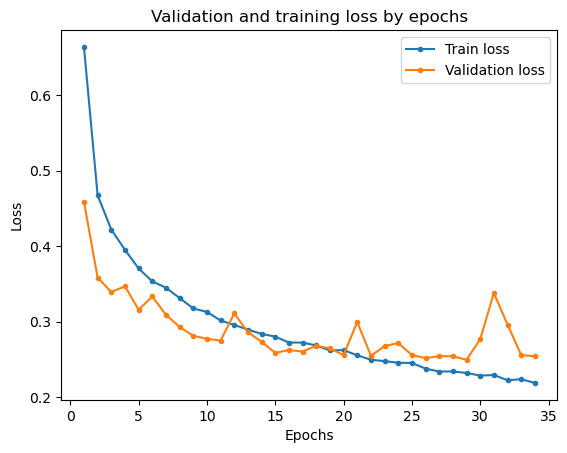

In [511]:
model = ConvNN4_batch_norm()
optimizer_adam = torch.optim.AdamW(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader, val_loader=norm_val_loader)

Změna optimizeru přesnost nezvýšila. Vezmu proto znovu optimizer `Adam` a nejlepší model znovu natrénuji, ale zvýším limity epoch, které trénování ukončují, abych si ověřil, že validační přesnost opravdu ani po delší době nazačne znovu klesat.

  1%|▍                                        | 1/100 [01:20<2:12:01, 80.01s/it]

Epoch: 1, TRAIN loss: 0.665, VALIDATION loss: 0.407, ACC: 0.845


  5%|██                                       | 5/100 [06:41<2:07:57, 80.82s/it]

Epoch: 5, TRAIN loss: 0.366, VALIDATION loss: 0.308, ACC: 0.884


 10%|████                                    | 10/100 [11:19<1:26:21, 57.57s/it]

Epoch: 10, TRAIN loss: 0.308, VALIDATION loss: 0.269, ACC: 0.900


 15%|██████                                  | 15/100 [15:40<1:15:45, 53.48s/it]

Epoch: 15, TRAIN loss: 0.274, VALIDATION loss: 0.283, ACC: 0.894


 20%|████████                                | 20/100 [20:04<1:11:01, 53.27s/it]

Epoch: 20, TRAIN loss: 0.250, VALIDATION loss: 0.259, ACC: 0.908


 25%|██████████                              | 25/100 [25:14<1:21:29, 65.20s/it]

Epoch: 25, TRAIN loss: 0.231, VALIDATION loss: 0.264, ACC: 0.904


 30%|████████████                            | 30/100 [31:53<1:31:50, 78.73s/it]

Epoch: 30, TRAIN loss: 0.217, VALIDATION loss: 0.254, ACC: 0.910


 35%|██████████████                          | 35/100 [38:53<1:29:26, 82.57s/it]

Epoch: 35, TRAIN loss: 0.205, VALIDATION loss: 0.255, ACC: 0.910


 40%|████████████████                        | 40/100 [43:53<1:00:18, 60.31s/it]

Epoch: 40, TRAIN loss: 0.198, VALIDATION loss: 0.259, ACC: 0.911


 45%|██████████████████▉                       | 45/100 [49:06<56:59, 62.18s/it]

Epoch: 45, TRAIN loss: 0.189, VALIDATION loss: 0.268, ACC: 0.906


 45%|██████████████████                      | 45/100 [49:58<1:01:05, 66.64s/it]

Model hasn't improved in the last 15 iterations. Training stopped.
Max accuracy: 0.9133333563804626


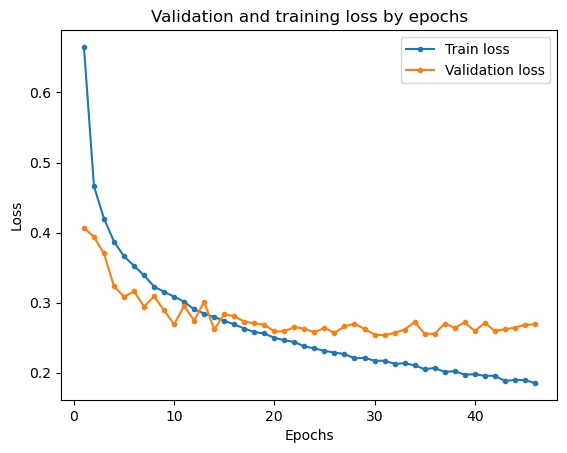

In [512]:
model = ConvNN4_batch_norm()
optimizer_adam = torch.optim.Adam(model.parameters())
early_stopping_train(model, loss_fn, optimizer_adam, train_loader=norm_train_loader,
                     val_loader=norm_val_loader, max_epoch=100, not_improved_limit=15 )

Delší trénování pomohlo a validační přesnost se zvýšila na 91,3%. Z grafu je vidět, že trénovací chyba klesá pořád směrem k 0, ale validační od jisté chvíle zůstává pořád na podobném místě. Je možné, že by nějakou další regulazicí šla výsledná validační přesnost ještě o něco zvýšit, ale o to se již pokoušet nebudu a tuto síť použiji jako finální.

Načtu si proto nejlepší model a otestuji jeho přesnost na testovacích datech.

In [608]:
#create test loader
norm_test_loader = torch.utils.data.DataLoader(norm_test_data, batch_size=128, shuffle=False)

#load best model
model.load_state_dict(torch.load(MODEL_PATH))

#test accuracy
correct_count = 0
model.eval()

with torch.no_grad():
    for data, labels in norm_test_loader:
        outputs = model(data)
        correct_count += (outputs.argmax(1) == labels).float().sum()

total_count = len(norm_test_data)
print(f"Performance on test set: {int(correct_count)} / {total_count}")
print(f"With accuracy: {float(correct_count)/float(total_count):.3f}") 

Performance on test set: 7658 / 8400
With accuracy: 0.912


Testovací přesnost vychází také přes 91%. S tím jsem spokojen a napočítám predikce pro data k evaulaci ze souboru `evaluate.csv`.

In [617]:
#load csv
to_eval_df = pd.read_csv('evaluate.csv')

In [618]:
#to numpy
source_IDs = to_eval_df["ID"]
source_imgs = to_eval_df.drop("ID", axis=1).to_numpy()
#normalization
source_imgs = source_imgs/255
#reshape
source_imgs = source_imgs.reshape(-1, 1, 32, 32)
print(source_imgs.shape)

(14000, 1, 32, 32)


In [619]:
#create pytorch tensor dataset
eval_dataset = torch.utils.data.TensorDataset(torch.tensor(source_imgs, dtype = torch.float))
print(f"Number of elements: {len(eval_dataset)}")

Number of elements: 14000


In [620]:
#create loader with shuffle disabled so that i load imgs in the right order
eval_loader = torch.utils.data.DataLoader(eval_dataset, batch_size=128, shuffle=False)

In [621]:
#create dataset for storing results
res_df = pd.DataFrame(columns=["ID", "label"])

Nyní postupně napočítám predikce a uložím je do výsledného dataframe.

In [622]:
model.eval()
ID = 0

with torch.no_grad():
    for data in eval_loader:
        #unpack from list
        images = data[0]
        outputs = model(images)
        for pred in outputs:
            label = pred.argmax()
            #add row to results
            res_df.loc[len(res_df.index)] = [ID, label.item()] 
            ID += 1

In [623]:
res_df

,ID,label
0,0,3
1,1,3
2,2,0
3,3,3
4,4,5
...,...,...
13995,13995,8
13996,13996,6
13997,13997,4
13998,13998,9


Vypadá to, že data mají správnou strukturu, takže je uložím do souboru.

In [624]:
res_df.to_csv('results.csv', index=False)